In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [178]:
# getting raw data
formula1_df = pd.read_csv('race_results_1950-2020.xls')
formula1_df

,Unnamed: 0,Year,Position,Driver No.,Venue,Name,NameTag,Team,Laps,Time,Points
0,0,1950,1,2,great-britain,Nino Farina,FAR,Alfa Romeo,70.0,2:13:23.600,9.0
1,1,1950,2,3,great-britain,Luigi Fagioli,FAG,Alfa Romeo,70.0,+2.600s,6.0
2,2,1950,3,4,great-britain,Reg Parnell,PAR,Alfa Romeo,70.0,+52.000s,4.0
3,3,1950,4,14,great-britain,Yves Giraud Cabantous,CAB,Talbot-Lago,68.0,+2 laps,3.0
4,4,1950,5,15,great-britain,Louis Rosier,ROS,Talbot-Lago,68.0,+2 laps,2.0
...,...,...,...,...,...,...,...,...,...,...,...
23070,23070,2020,NC,63,italy,George Russell,RUS,Williams Mercedes,51.0,DNF,0.0
23071,23071,2020,NC,33,italy,Max Verstappen,VER,Red Bull Racing Honda,50.0,DNF,0.0
23072,23072,2020,NC,20,italy,Kevin Magnussen,MAG,Haas Ferrari,47.0,DNF,0.0
23073,23073,2020,NC,31,italy,Esteban Ocon,OCO,Renault,27.0,DNF,0.0


In [ ]:
formula1_df.info()

In [ ]:
# check sum of null values
formula1_df.isnull().sum()


In [168]:
# Create and write results 

# Create subsets
subset_df = formula1_df[['Year', 'Position', 'Venue', 'Name']]
maxver = subset_df[(subset_df['Name'] == 'Max Verstappen') & (subset_df['Year'] == 2019)]
sebvet = subset_df[(subset_df['Name'] == 'Sebastian Vettel') & (subset_df['Year'] == 2019)]
charlec = subset_df[(subset_df['Name'] == 'Charles Leclerc') & (subset_df['Year'] == 2019)]
lewis = subset_df[(subset_df['Name'] == 'Lewis Hamilton') & (subset_df['Year'] == 2019)]
bottas = subset_df[(subset_df['Name'] == 'Valtteri Bottas') & (subset_df['Year'] == 2019)]

# Write to csv
maxver.to_csv('driver csv/Max.csv')
sebvet.to_csv('driver csv/Seb.csv')
charlec.to_csv('driver csv/Charles.csv')
lewis.to_csv('driver csv/Lewis.csv')
bottas.to_csv('driver csv/Bottas.csv')


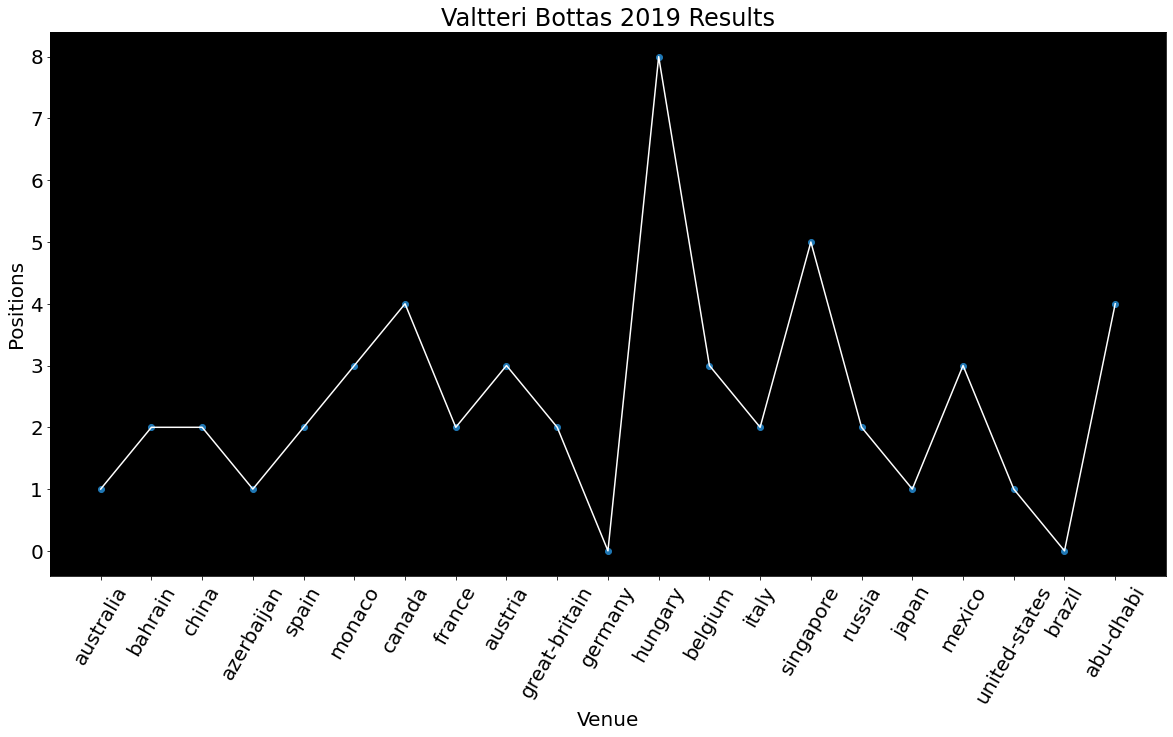

In [173]:
# Read csv
results_df = pd.read_csv('driver csv/Bottas.csv')

# Get only 2 columns
results_subsets = results_df[['Position', 'Venue']]

# Replaced values 
results_replaced = results_subsets.replace(to_replace ="NC", 
                 value = 0)
# Convert to integer
results_replaced['Position'] = results_replaced['Position'].astype(int)

# Plot graphs
plt.figure(figsize=(20,10))
plt.rcParams['axes.facecolor'] = 'black'
x = results_replaced['Venue']
y = results_replaced['Position']
plt.scatter(x,y)
plt.plot(x,y, color='white')
plt.xticks(rotation=60)
plt.xlabel("Venue")
plt.ylabel("Positions")
plt.title("Valtteri Bottas 2019 Results")
plt.savefig('img/Bottas.png',bbox_inches='tight')
plt.show()

In [7]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 15)
        self.cell(0, 10, 'F1 2019', 1, 1, 'C')  

# Writing to pdf 
pdf = PDF()
pdf.alias_nb_pages()
pdf.add_page()

# Adding name and images
pdf.cell(20, 40, 'Max Verstappen')
pdf.image('img/Max_profile.jpg',13,50,40, link='https://www.formula1.com/en/drivers/max-verstappen.html')
pdf.image('img/Max.png', 60, 30, 130)

pdf.text(10,130,'Lewis Hamilton')
pdf.image('img/Lewis_profile.jpg', 13, 140, 40, link='https://www.formula1.com/en/drivers/lewis-hamilton.html')
pdf.image('img/Lewis.png', 60, 120, 130)

pdf.text(10, 220, 'Valtteri Bottas')
pdf.image('img/Bottas_profile.jpg', 13, 230, 40, link='https://www.formula1.com/en/drivers/valtteri-bottas.html')
pdf.image('img/Bottas.png', 60, 210, 130)

# Save as pdf
pdf.output('F1 2019.pdf', 'F')